In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sb
sb.set_style('darkgrid')

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [2]:
cars=pd.read_csv('Cars93.csv')

In [3]:
cars

,col.no,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [4]:
cars.rename(columns={'Unnamed: 0':'S.No'},inplace=True)

In [5]:
cars

,col.no,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [6]:
cars.describe()

,col.no,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [7]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
col.no                93 non-null int64
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64


In [8]:
cars['Luggage.room'].isnull().sum()

11

In [9]:
cars['Luggage.room'].median()

14.0

In [10]:
cars['Luggage.room'].fillna((cars['Luggage.room'].median()),inplace=True)

In [11]:
cars['Luggage.room'].isnull().sum()

0

In [12]:
cars.isnull().sum()

col.no                0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        2
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

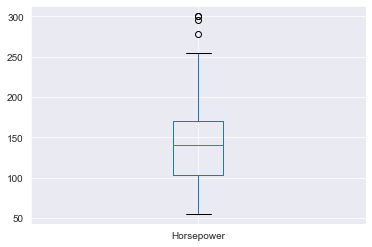

In [13]:
cars['Horsepower'].plot(kind='box')

In [14]:

q1=cars['Horsepower'].quantile(0.25)
q3=cars['Horsepower'].quantile(0.75)
iqr=q3-q1 
od=q1-1.5*iqr
ou=q3+1.5*iqr 
ncars=cars.loc[(cars['Horsepower']>od)  & (cars['Horsepower']<ou)]

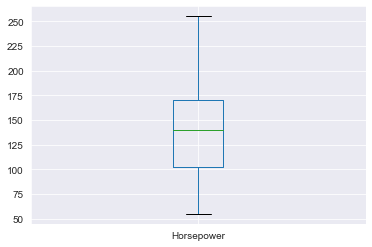

In [15]:
ncars['Horsepower'].plot(kind='box')

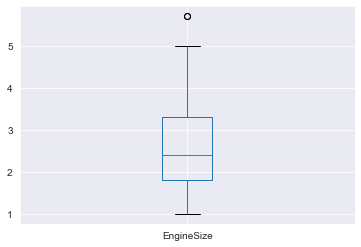

In [16]:
cars['EngineSize'].plot(kind='box')

In [17]:
q1=cars['EngineSize'].quantile(0.25)
q3=cars['EngineSize'].quantile(0.75)
iqr=q3-q1 
od=q1-1.5*iqr
ou=q3+1.5*iqr 
ncars=cars.loc[(cars['EngineSize']>od)  & (cars['EngineSize']<ou)]

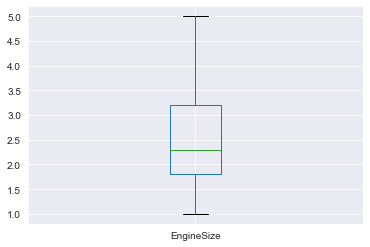

In [18]:
ncars['EngineSize'].plot(kind='box')

In [19]:
ncars

,col.no,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,14.0,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


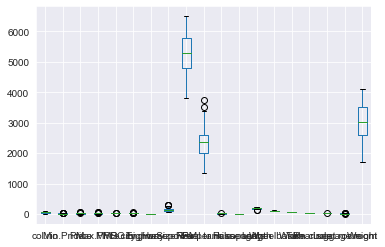

In [20]:
ncars.plot(kind='box')

In [21]:
features=list(set(ncars.columns)-set(['Manufacturer','Model','Type','AirBags','DriveTrain','Man.trans.avail','Origin','Make','Passengers','S.No','Cylinders','Rear.seat.room','Min.Price','Fuel.tank.capacity','Weight','Rev.per.mile','Price','Luggage.room','Length','Max.Price','Turn.circle','MPG.highway','Width','Wheelbase','MPG.city']))

In [22]:
features

['Horsepower', 'RPM', 'EngineSize', 'col.no']

In [23]:
cars[features].isnull().sum()

Horsepower    0
RPM           0
EngineSize    0
col.no        0
dtype: int64

In [24]:
cars[features]

,Horsepower,RPM,EngineSize,col.no
0,140,6300,1.8,1
1,200,5500,3.2,2
2,172,5500,2.8,3
3,172,5500,2.8,4
4,208,5700,3.5,5
...,...,...,...,...
88,109,4500,2.5,89
89,134,5800,2.0,90
90,178,5800,2.8,91
91,114,5400,2.3,92


In [25]:
cars[features].isnull().sum()

Horsepower    0
RPM           0
EngineSize    0
col.no        0
dtype: int64

In [26]:
X=ncars[features]
y=ncars['Price']

In [27]:
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.3,random_state=0)

In [28]:
Lreg=LinearRegression()
model2=Lreg.fit(X,y)

In [29]:
model2.score(X,y)

0.6123290143639555

In [30]:
Lreg=LinearRegression()
model=Lreg.fit(trainX,trainy)
preds=model.predict(testX)

In [31]:
print(preds)

[22.0411729  13.52572847 20.78531661 10.02848888 14.75988705 11.48040062
 38.53989698 11.54456199 12.20087931 23.64723517 22.20585745 11.48223503
 18.90538322 23.5560376  26.52327622 22.92069536 12.43816395 17.87357691
 14.70169182 16.24718094 12.39460975 22.16230325 20.27336722 21.539267
 14.65568471 17.08627981 23.68670019  9.62668656]


In [32]:
model.score(X,y)

0.6049999898656474

In [33]:
model.score(testX,testy)

0.6807952416720946

In [34]:
model.predict(X)

array([17.5863311 , 25.99033275, 22.0411729 , 22.06295   , 27.47088352,
       13.32973457, 22.16230325, 22.20585745, 26.52327622, 40.03443274,
       13.46039717, 13.48217427, 20.56056633, 13.52572847, 22.35829715,
       21.56617982, 22.92069536, 20.17742493, 18.19254227, 19.09435358,
       11.35157244, 11.22520581, 12.39460975, 18.43218319, 12.43816395,
       39.81927965, 11.48223503, 28.86826212,  6.89480341, 16.69843794,
       11.48040062, 12.95265092, 14.66541076, 18.90538322, 18.27338322,
       25.6615605 ,  6.26956818, 11.12720695, 21.11766194, 13.00447291,
       18.33182424, 10.02848888, 16.24718094, 11.54456199, 16.96864942,
       38.53989698, 24.69237669, 30.49171941, 21.539267  , 28.8552227 ,
       10.09059146, 13.355218  , 21.9636184 , 20.78531661, 33.59232753,
       17.08627981, 29.45446952, 13.10976825, 18.73141797, 12.20087931,
       27.76744706, 14.67547735, 20.27336722, 20.34322871, 21.815479  ,
       21.18870373, 14.70169182, 23.5342605 , 23.5560376 , 11.96